# Introduction

L'analyse en composantes principales (ACP) est une technique linéaire de réduction de la dimensionnalité qui peut être utilisée pour extraire des informations d'un espace à haute dimension en les projetant dans un sous-espace à plus faible dimension. Elle tente de préserver les parties essentielles qui présentent le plus de variations dans les données et d'éliminer les parties non essentielles qui présentent moins de variations.

Les dimensions ne sont rien d'autre que des caractéristiques qui représentent les données. Par exemple, une image de 28 X 28 comporte 784 éléments d'image (pixels) qui sont les dimensions ou les caractéristiques qui, ensemble, représentent cette image.

Une chose importante à noter au sujet de l'ACP est qu'il s'agit d'une technique de réduction de la dimensionnalité non supervisée, vous pouvez regrouper les points de données similaires sur la base de la corrélation des caractéristiques entre eux sans aucune supervision (ou étiquettes), et vous apprendrez comment réaliser cela de manière pratique en utilisant Python dans les sections ultérieures de ce tutoriel !

Selon Wikipedia, l'ACP est une procédure statistique qui utilise une transformation orthogonale pour convertir un ensemble d'observations de variables éventuellement corrélées (entités dont chacune prend diverses valeurs numériques) en un ensemble de valeurs de variables linéairement non corrélées appelées composantes principales.

Remarque : Les termes "caractéristiques", "dimensions" et "variables" désignent tous la même chose. Vous les trouverez utilisés de manière interchangeable.

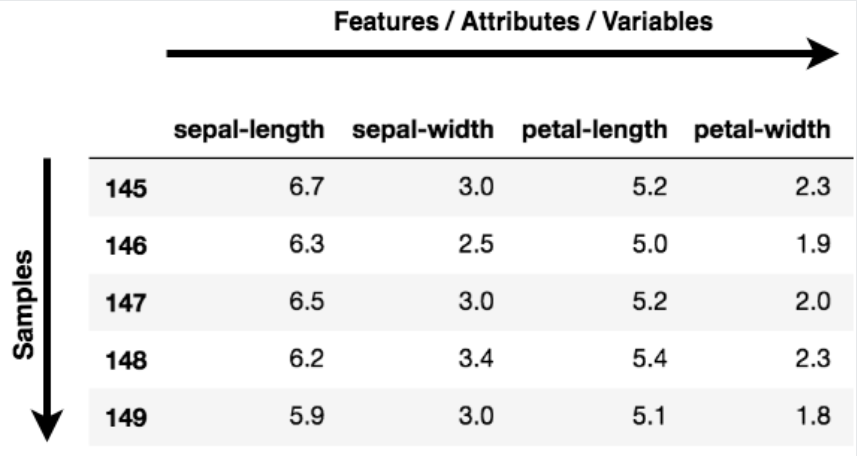

# Mais où pouvez-vous appliquer le PCA ?

- **Visualisation des données** : Lorsqu'on travaille sur un problème lié aux données, le défi dans le monde d'aujourd'hui est le simple volume de données, et les variables/caractéristiques qui définissent ces données. Pour résoudre un problème dont les données sont la clé, vous devez procéder à une exploration approfondie des données, par exemple en découvrant comment les variables sont corrélées ou en comprenant la distribution de quelques variables. Si l'on considère qu'il y a un grand nombre de variables ou de dimensions le long desquelles les données sont distribuées, la visualisation peut être un défi et presque impossible.

L'ACP peut donc vous aider, car elle projette les données dans une dimension inférieure, ce qui vous permet de les visualiser à l'œil nu dans un espace 2D ou 3D.

- **Accélération de l'algorithme d'apprentissage machine (ML)** : L'idée principale de l'ACP étant la réduction de la dimensionnalité, vous pouvez l'exploiter pour accélérer le temps d'apprentissage et de test de votre algorithme d'apprentissage automatique si vos données présentent de nombreuses caractéristiques et que l'apprentissage de l'algorithme d'apprentissage automatique est trop lent.

À un niveau abstrait, vous prenez un ensemble de données ayant de nombreuses caractéristiques, et vous simplifiez cet ensemble de données en sélectionnant quelques composantes principales à partir des caractéristiques originales.

# Qu'est-ce qu'une composante principale ?

Les composantes principales sont la clé de l'ACP ; elles représentent ce qui se cache sous le capot de vos données. En termes simples, lorsque les données sont projetées dans une dimension inférieure (supposons trois dimensions) à partir d'un espace supérieur, les trois dimensions ne sont rien d'autre que les trois composantes principales qui capturent (ou détiennent) la plupart de la variance (information) de vos données.

Les composantes principales ont à la fois une direction et une magnitude. La direction représente les axes principaux sur lesquels les données sont le plus étalées ou ont le plus de variance et l'amplitude signifie la quantité de variance que la composante principale capture des données lorsqu'elle est projetée sur cet axe. Les composantes principales sont une ligne droite, et la première composante principale contient la plus grande variance des données. Chaque composante principale suivante est orthogonale à la dernière et a une variance plus faible. Ainsi, à partir d'un ensemble de x variables corrélées sur y échantillons, on obtient un ensemble de u composantes principales non corrélées sur les mêmes y échantillons.

La raison pour laquelle vous obtenez des composantes principales non corrélées à partir des caractéristiques d'origine est que les caractéristiques corrélées contribuent à la même composante principale, réduisant ainsi les caractéristiques des données d'origine en composantes principales non corrélées, chacune représentant un ensemble différent de caractéristiques corrélées avec différentes quantités de variation.

Chaque composante principale représente un pourcentage de la variation totale capturée dans les données.

Dans le tutoriel d'aujourd'hui, vous allez principalement appliquer l'ACP pour la visualisation de données.

# Comprendre les données

Avant de vous lancer dans le chargement des données, il est bon de comprendre et d'examiner les données avec lesquelles vous allez travailler !

## Breast Cancer

L'ensemble de données sur le cancer du sein est une donnée multivariable à valeurs réelles qui se compose de deux classes, chaque classe indiquant si une patiente est atteinte ou non d'un cancer du sein. Les deux catégories sont : maligne et bénigne.

La classe maligne compte 212 échantillons, tandis que la classe bénigne compte 357 échantillons.

Il y a 30 caractéristiques partagées par toutes les classes : rayon, texture, périmètre, surface, lissage, dimension fractale, etc.

Vous pouvez télécharger l'ensemble de données sur le cancer du sein à partir d'[ici](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)), ou plutôt un moyen facile est de le charger avec l'aide de la bibliothèque sklearn.

## CIFAR - 10

Le jeu de données CIFAR-10 (Canadian Institute For Advanced Research) est composé de 60 000 images, chacune d'entre elles étant une image couleur de 32x32x3 et comportant dix classes, avec 6 000 images par catégorie.

Le jeu de données est composé de 50 000 images d'entraînement et de 10 000 images de test.

Les classes du jeu de données sont : avion, automobile, oiseau, chat, cerf, chien, grenouille, cheval, bateau, camion.

Vous pouvez télécharger le jeu de données CIFAR à partir d'[ici](https://www.cs.toronto.edu/~kriz/cifar.html), ou vous pouvez également le charger à la volée à l'aide d'une bibliothèque d'apprentissage profond comme Keras.

# Imporation des packages

In [ ]:
from sklearn.datasets import load_breast_cancer
from keras.datasets import cifar10

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Exploration de la données

Vous allez maintenant charger et analyser les jeux de données Breast Cancer et CIFAR-10. Vous avez maintenant une idée de la dimensionnalité de ces deux jeux de données.

Donc, explorons rapidement les deux ensembles de données.

## Exploration de la données de Breast Cancer

Vous allez maintenant charger et analyser les jeux de données Breast Cancer et CIFAR-10. Vous avez maintenant une idée de la dimensionnalité de ces deux jeux de données.

Explorons donc rapidement ces deux ensembles de données.

In [ ]:
breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))

In [ ]:
print(breast_data.shape)
print(labels.shape)

(569, 30)
(569, 1)


On ajoute notre variable cible à notre jeu de données, ici le but n'est pas de résoudre un problème de classification.

In [ ]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)
features = np.append(breast.feature_names,'label')
breast_dataset.columns = features

In [ ]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [ ]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign


## Exploration des données de CIFAR-10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
print('Traning data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)
print(y_train.shape)
print(y_test.shape)

Traning data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


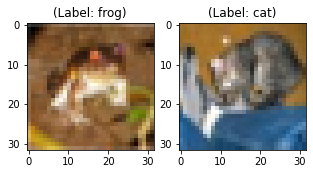

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))

# Visualisation des données grâce à la PCA

Voici maintenant la partie la plus passionnante de ce tutoriel. Comme vous avez appris précédemment que les projets d'ACP transforment des données de haute dimension en une composante principale de basse dimension, il est maintenant temps de visualiser cela avec l'aide de Python !

## Application sur le jeu de données Breast Cancer

Commencez par normaliser les données puisque le résultat de l'ACP est influencé par l'échelle des caractéristiques des données.

C'est une pratique courante de normaliser vos données avant de les soumettre à un algorithme d'apprentissage automatique.

Pour appliquer la normalisation, vous allez importer le module StandardScaler de la bibliothèque sklearn et sélectionner uniquement les caractéristiques de l'ensemble de données breast_dataset que vous avez créé à l'étape d'exploration des données. Une fois que vous avez les caractéristiques, vous appliquerez la mise à l'échelle en effectuant fit_transform sur les données des caractéristiques.

Lors de l'application de StandardScaler, chaque caractéristique de vos données doit être normalement distribuée de sorte que la distribution soit mise à l'échelle avec une moyenne de zéro et un écart type de un.

Utilisez la fonction **StandarScaler** de [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). 

In [ ]:
x = breast_dataset.loc[:, features].values

## Start your code
x = None
## End Your code

Ajoute des noms des variables

In [ ]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)

Maintenant vient la partie critique, les prochaines lignes de code vont projeter les données du cancer du sein en trente dimensions vers des composantes principales bidimensionnelles.

Vous utiliserez la bibliothèque sklearn pour importer le module PCA, et dans la méthode PCA, vous passerez le nombre de composantes (n_composantes=2) pour enfin appeler fit_transform sur les données agrégées. Ici, plusieurs composantes représentent la dimension inférieure dans laquelle vous allez projeter vos données de dimension supérieure.

Utilisez la fonction **PCA** de [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [ ]:
## Start your code
pca_breast = None
principalComponents_breast = None
## End Your code

Stockage des données dans un dataframe Pandas.

In [ ]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])

Visualisation du dataframe obtenu.

In [ ]:
principal_breast_Df.head()

,principal component 1,principal component 2
0,9.225770,2.116196
1,2.655802,-3.784776
2,5.892492,-1.005579
3,7.135401,10.318716
4,4.129423,-1.905579


Une fois que vous avez les composantes principales, vous pouvez trouver le rapport de variance expliquée (explained_variance_ratio). Il vous fournira la quantité d'informations ou de variance que chaque composante principale détient après avoir projeté les données dans un sous-espace de dimension inférieure.

In [ ]:
## Start your code
explained_variance = None
## End Your code
print('Explained variation per principal component: {}'.format(explained_variance))

Explained variation per principal component: [0.44896035 0.18472104]


À partir du résultat ci-dessus, vous pouvez observer que la composante principale 1 contient 44,2 % de l'information, tandis que la composante principale 2 ne contient que 19 % de l'information. L'autre point à noter est qu'en projetant des données à trente dimensions vers des données à deux dimensions, 36,8% de l'information a été perdue.

Traçons la visualisation des 569 échantillons le long de l'axe de la composante principale - 1 et de la composante principale - 2. Cela devrait vous donner un bon aperçu de la façon dont vos échantillons sont répartis entre les deux classes.

<Figure size 432x288 with 0 Axes>

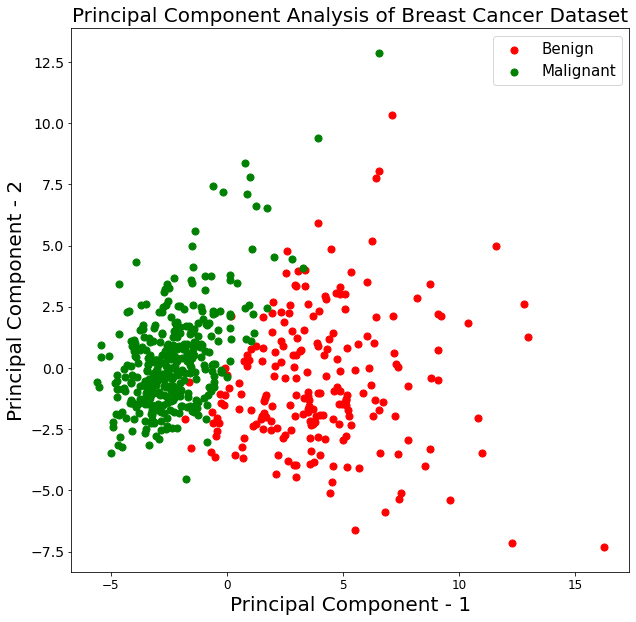

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.show()

À partir du graphique ci-dessus, vous pouvez observer que les deux classes bénigne et maligne, lorsqu'elles sont projetées dans un espace bidimensionnel, peuvent être linéairement séparées jusqu'à un certain point. On peut également observer que la classe bénigne est étalée par rapport à la classe maligne.

## Application de la PCA sur les jeu de données CIFAR - 10

Les lignes de code suivantes pour visualiser les données CIFAR-10 sont assez similaires à la visualisation PCA des données du cancer du sein.

Vérifions rapidement les valeurs maximales et minimales des images d'entraînement CIFAR-10 et normalisons les pixels entre 0 et 1 inclus.

In [ ]:
np.min(x_train),np.max(x_train)

(0, 255)

In [ ]:
x_train = x_train/255.0

In [ ]:
np.min(x_train),np.max(x_train)

(0.0, 1.0)

Ensuite, vous allez créer un DataFrame qui contiendra les valeurs en pixels des images ainsi que leurs étiquettes respectives dans un format ligne-colonne.

Mais avant cela, redéfinissons les dimensions de l'image de trois à un (aplatissez les images).

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train_flat = x_train.reshape(-1,3072)
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)

In [ ]:
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))

Size of the dataframe: (50000, 3073)


Parfait ! La taille du cadre de données est correcte puisqu'il y a 50 000 images d'entraînement, chacune ayant 3072 pixels et une colonne supplémentaire pour les étiquettes, soit 3073 au total.

L'ACP sera appliquée sur toutes les colonnes, sauf la dernière, qui est le label de chaque image.

In [ ]:
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


Ensuite, vous créerez la méthode PCA et passerez le nombre de composantes à deux et appliquerez **fit_transform** sur les données d'entraînement, ceci peut prendre quelques secondes puisqu'il y a 50,000 échantillons.

Utilisez la fonction **PCA** de [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In [ ]:
## Start your code
pca_cifar = None
principalComponents_cifar = None
## End Your code

Ensuite, vous allez convertir les composantes principales de chacune des 50 000 images d'un tableau numpy en un DataFrame pandas.

In [ ]:
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train

In [ ]:
principal_cifar_Df.head()

,principal component 1,principal component 2,y
0,-6.401018,2.729039,6
1,0.829783,-0.949943,9
2,7.730200,-11.522102,9
3,-10.347817,0.010738,4
4,-2.625651,-4.969240,1


Déterminons rapidement la quantité d'information ou la variance que les composantes principales détiennent.

In [ ]:
## Start your code
variance_explained = None
## End Your code
print('Explained variation per principal component: {}'.format(variance_explained))

Explained variation per principal component: [0.2907663  0.11253144]


Il semble qu'une quantité décente d'informations ait été retenue par les composantes principales 1 et 2, étant donné que les données ont été projetées de 3072 dimensions à seulement deux composantes principales.

Il est temps de visualiser les données CIFAR-10 dans un espace bidimensionnel. N'oubliez pas qu'il existe un certain chevauchement des classes sémantiques dans cet ensemble de données, ce qui signifie qu'une grenouille peut avoir une forme légèrement similaire à celle d'un chat ou un cerf à celle d'un chien, surtout lorsqu'ils sont projetés dans un espace bidimensionnel. Les différences entre les deux peuvent ne pas être très bien saisies.

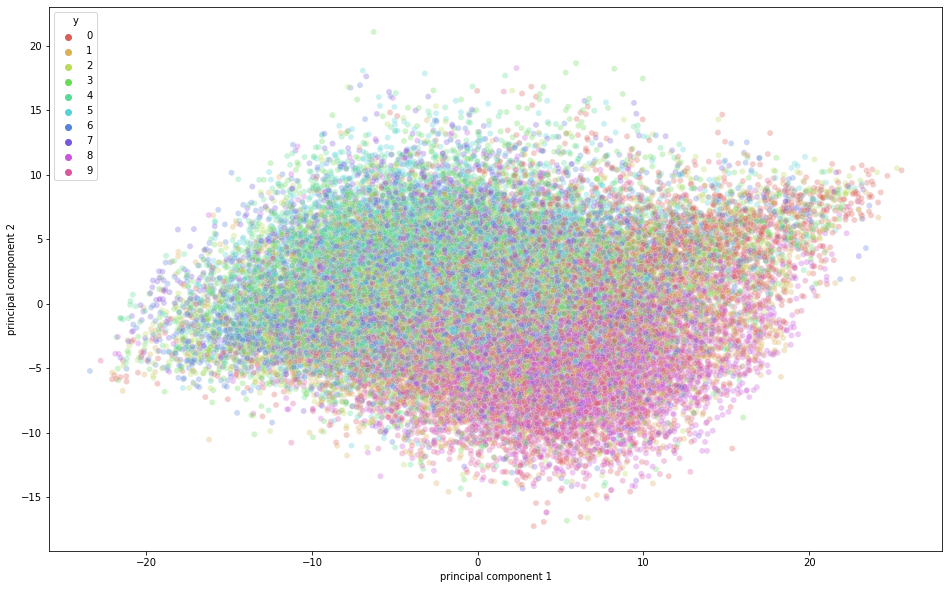

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)
plt.show()

Sur la figure ci-dessus, vous pouvez observer qu'une certaine variation a été capturée par les composantes principales puisqu'il existe une certaine structure dans les points lorsqu'ils sont projetés le long des deux axes des composantes principales. Les points appartenant à la même classe sont proches les uns des autres, et les points ou images très différents sémantiquement sont plus éloignés les uns des autres.